# <center>梯度下降方法总结</center>  

<center>姓名：齐家兴；学号：20171264；专业：软件工程</center> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image

**深度学习中，我们最常用的优化算法就是基于梯度的方式了。所以在这里总结一下我目前所能理解的方法。（PS：在写这个的过程中，我发现指数平均无处不在啊。这个在可视化模型的Loss值随迭代次数的改变，为了使图像看起来更加平滑，用的也是指数平均。看来是该了解一下了！）**

## 梯度下降示例（回归问题）  

**示例中的数据是自己生成的，真实数据符合：** $$y = 3x + 5$$ 

**
构建$y = wx + b$模型拟合数据，  通过梯度下降的方法更新参数w,b。比较几种梯度下降更新方式的优缺点。  
目标函数为均方误差：$$Loss = \frac{1}{N}\sum_{i=0}^{N}\frac{1}{2}(\hat{y}^{(i)} - y^{(i)})^2$$
**

In [2]:
x = np.arange(0, 20)
y = 3 * x + 5 

Text(0.5,0,'Loss')

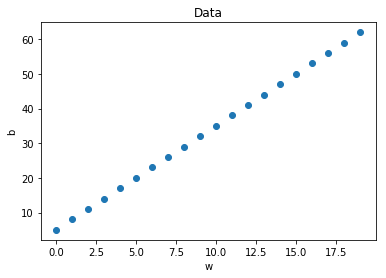

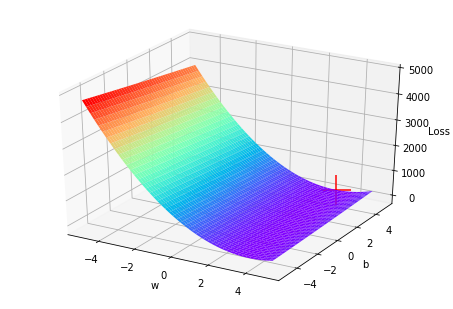

In [3]:
plt.scatter(x, y)
plt.xlabel('w')
plt.ylabel('b')
plt.title('Data')

fig = plt.figure()
ax = Axes3D(fig)
w = np.linspace(-5, 5)
b = np.linspace(-5, 5)
w, b = np.meshgrid(w, b)
loss = []
for w_i, b_i in zip(w.flatten(), b.flatten()):
    y_hat = w_i * x + b_i
    loss.append(np.mean((y_hat - y) ** 2) / 2)
    
    
ax.scatter(3, 5, 0, c='r',s=30**2, marker='+')                     #最优解
ax.plot_surface(w, b, np.array(loss).reshape(50, 50), cmap='rainbow',alpha=1)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

## 梯度下降：
	
   **深度学习中给一个目标函数$L(w)$  ，我们的目标是找到令其最小化的一组参数$w$。目前最常用的就是梯度下降了，找到一个方向，令当前的$w$向该方向移动从而减小目标函数的值。这个方向就是梯度的负方向（具体证明）。所以$w$的更新公式为：**$$\large w^{t+1} = w^{t} - \eta g^t$$

**
其中$\eta$为步长或者学习率，$g^t = \frac{\partial L}{\partial w}$即第t次迭代，$L$对$w$的梯度。  
但上面这种更新参数的方式存在一个问题，就是$\eta$如何取值，如果取值过大就很有可能跳过最优点，取值过小那么更新的就会很慢。我们在更新参数的过程中，一开始离最优解比较远，我们希望步伐迈的可以大一点，当离最优解越来越近的时候，我们希望步伐要小一点，因此有人就提出一种随着迭代次数的增加步长逐渐减小的更新方式：$$\large w^{t+1} = w^t - \eta^t g^t$$
其中$\eta^t = \frac{\eta}{\sqrt{ t+1 }}$,$ \eta$ 为 步长或者学习率。<br>
**

**
下面是计算参数w，b梯度以及可视化更新过程代码。
**

In [4]:
# 计算w, b的梯度
def compute_grad(paramters, w, b):
    y_hat = paramters['y_hat']
    y =  paramters['y']
    x = paramters['x']
   
    grad_w = np.sum((y_hat - y) * x)
    grad_b = np.sum((y_hat - y))
    return grad_w, grad_b

In [5]:
# 可视化每次参数的更新
def plot_history(w_history, b_history, title=None):
    plt.scatter(3., 5., c = 'r' ,s=50**2, marker='+')
    plt.scatter(w_history, b_history, s=20, marker='o')
    plt.plot(w_history, b_history)
    plt.xlabel('w')
    plt.ylabel('b')
    plt.title(title)
    fig = plt.figure()
    ax = Axes3D(fig)
    w = np.linspace(-5, 5)
    b = np.linspace(-5, 5)
    w, b = np.meshgrid(w, b)
    loss = []
    for w_i, b_i in zip(w.flatten(), b.flatten()):
        y_hat = w_i * x + b_i
        loss.append(np.mean((y_hat - y) ** 2) / 2)

    w_history, b_history = np.array(w_history),np.array(b_history)
    history = []
    for w_i, b_i in zip(w_history, b_history):
        y_hat = w_i * x + b_i
        history.append(np.mean((y_hat - y) ** 2) / 2)

    ax.scatter(3, 5, 0, 'k+',s=20**2)                     #最优解
    ax.plot(w_history, b_history, history, c='k',alpha=1)
    ax.scatter(w_history, b_history, history, c='k',s=10**2, marker='o')
    ax.plot_surface(w, b, np.array(loss).reshape(50, 50), cmap='rainbow',alpha=1)
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_zlabel('Loss')

### Gradient Desent with leraning rate decay

In [6]:
iteration = 100000
w = b = 0
lr = 0.001
parameters = {}
parameters['y'] = y
parameters['x'] = x

w_history = [w]
b_history = [b]
loss_history = []
for t in range(iteration):
    y_hat = w * x + b
    parameters['y_hat'] = y_hat
    loss_t = np.mean((y_hat - y) ** 2) / 2             # mse loss
    grad_w, grad_b = compute_grad(parameters, w, b)
    w = w - lr / np.sqrt(t + 1) * grad_w
    b = b - lr / np.sqrt(t + 1) * grad_b
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_t)
print("After iteration 1000000 w = ", w)
print("After iteration 1000000 b = ", b)

After iteration 1000000 w =  3.0124698201218907
After iteration 1000000 b =  4.838243650840835


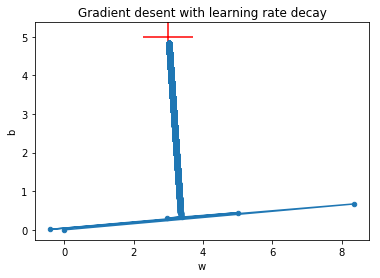

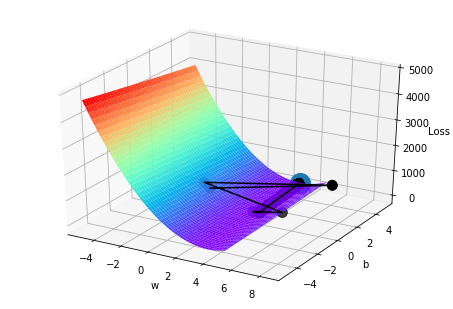

In [7]:
plot_history(w_history, b_history, title='Gradient desent with learning rate decay')

**<font color=#FF0000 size=3>上图可以看出普通的梯度更新方式，在迭代了10万次后才收敛到最优值(红色十字)，并且有震荡的现象。</font>**  

**
上述参数更新方法，学习率随着迭代次数的增加就会越来越小。但是这么做还是有些不足，因为所有参数的学习率都是一样的，这是很不科学的，因为对于L的不同维度而言。它距离最优点的距离是不一样的，如下图：  
**


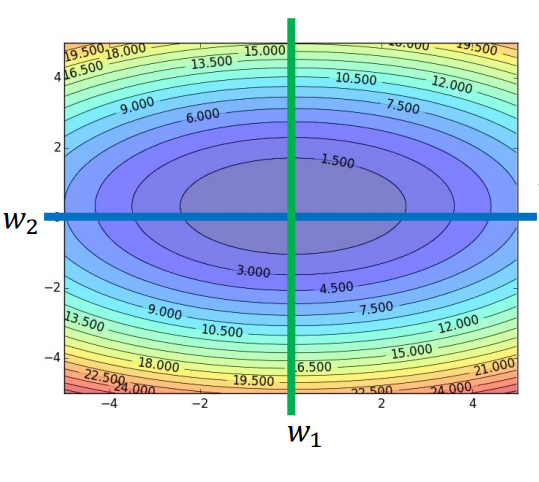

In [8]:
Image(filename='./1.png')

**
图中在 （水平）方向上loss的变化明显要比 （垂直）方向上的变化要明显 。我们如果在更新$w_1$和$w_2$时使用相同的学习率显然是不合适的。  
我们从上面的的结果中，也可以很清楚的看出传统梯度下降更新参数的缺点，参数w很快就收敛到了最优，但是参数b离最优值还很远。造成这种现象就是因为两个参数每次迭代步长都一样。对于不同的参数我们希望能够有属于自己的学习率，因此提出了一种叫做Adagrad的更新方式。
**
#### 更新公式：  
$$\large w^{t+1} = w^t - \frac{\eta}{\sqrt{\sum_{i=0}^{t}(g^i)^2}}g^t$$
**对于参数$w$每次更新的学习率要除以原来所有$w$梯度的平方根。这样对于每一个参数更新的速率都不一样，但是这样做的会产生什么影响呢？直观上的理解，随着算法不断迭代，分母会越来越大，整体的学习率会越来越小。所以，一般来说Adagrad算法一开始是激励收敛，到了后面就慢慢变成惩罚收敛，速度越来越慢。我们的希望也就达到了。**

**
这么做有什么依据吗？它当然不是凭空得到的。
给一个目标函数$L(w)$，求其最小值点，这不就是一个函数求极值的问题吗？我们知道当一阶导数等于0二阶导数大于0时函数有极小值。  
给定参数  我们用二阶Taylor公式在这一点展开，得到函数：$$f(w)=L(w^t)+L^{'}(w - w^t) + \frac{1}{2}L^{''}(w^t)(w-w^t)^2$$
**
**
$f$就是$L$在 处的二阶Taylor近似，显然$f$在$w^t$处的值与$L$相等。  
我们想要更新参数$w$，根据上面的介绍我们可以找其梯度的反方向乘以一个学习率更新。现在我们可以将这个将这个问题变为寻找$f$的极值，因为$f$是一个二次函数(凸函数)，所以我们令$f$对$w$求导等于0就可以得到极值点:$$w^{t+1} = w^t - \frac{L^{'}(w^t)}{L^{''}(w^t)}$$ 这就是在$w^t$处，更新w最优的步长。这种方法就叫做牛顿法。最理想的情况下，牛顿法只需要一次迭代就可以找到最优解。我们跟上述的梯度下降更新公式比较，牛顿法在更新参数$w$的过程中，迈步的大小是跟二阶导数成反比的，也就是说学习率$\eta$实际上替代的是二阶导数。而在Adagrad中使用累计梯度的均方根（root mean square）来近似二阶导数。总之，步长是跟一阶导和二阶导都有关系的，但是二阶导计算复杂度比较高，所以我们设法用其他的方式来近似它或者简化它。
**

### Adagrad   
**在参数更新的方式换成Adagrad后，只迭代了1500次，参数w和b就达到了最优。**

In [9]:
iteration = 1500
w = b = 0
lr = 1
lr_w = 0
lr_b = 0
parameters = {}
parameters['y'] = y
parameters['x'] = x
w_history = [w]
b_history = [b]
loss_history = []
for i in range(iteration):
    y_hat = w * x + b
    parameters['y_hat'] = y_hat
    loss_i = np.mean((y_hat - y) ** 2) / 2             # mse loss
    grad_w, grad_b = compute_grad(parameters, w, b)
    lr_w += grad_w ** 2                                # sum w_t ** 2
    lr_b += grad_b ** 2                                # sum b_t ** 2
    w = w - lr / np.sqrt(lr_w) * grad_w
    b = b - lr / np.sqrt(lr_b) * grad_b
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_i)
print(w)
print(b)

3.0000691771084793
4.999123082502581


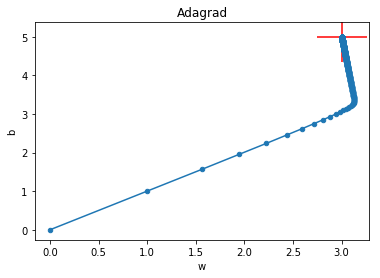

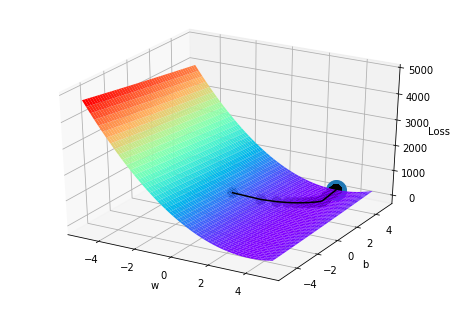

In [10]:
plot_history(w_history, b_history, title='Adagrad')

**<font color=#FF0000 size=3>上图可以看出Adagrad方法在迭代了1500次后就已经达到最优值(红色十字)，收敛速度有明显的提升，并且也比较稳定。</font>**  
  
  
**图中我们可以还可以看出Adagrad学习率衰减的过快，为了解决这个问题，有一种叫做RMSprop或均方根反向传播算法，它是由传奇人物Geoffrey Hinton提出的，当时只是在课堂上是随意提出的一个想法。（神一般的人物，都懒得发论文了。。。）更新公式： **   

$$\large w^t+1 = w^t - \frac{\eta}{\sigma^t}g^t$$
**
其中$\sigma^t = \sqrt{\alpha(\sigma^{t-1})^2+(1-\alpha)(g^t)^2}$, $\eta$为学习率。  
$\sigma^t$的计算公式，实际上是计算了梯度的指数平均值。它使得间隔和权重成比例变化，在计算步长时，用学习率除以$\sigma^t$，从而达到在其可以更快更平滑的向最优参数的方向移动。
**

### RMSprop

In [11]:
iteration = 200
w = b = 0
lr = 0.1
lr_w = 0
lr_b = 0
alpha = 0.9
parameters = {}
parameters['y'] = y
parameters['x'] = x
w_history = [w]
b_history = [b]
loss_history = []
for i in range(iteration):
    y_hat = w * x + b
    parameters['y_hat'] = y_hat
    loss_i = np.mean((y_hat - y) ** 2) / 2             # mse loss
    grad_w, grad_b = compute_grad(parameters, w, b)
    lr_w = alpha * lr_w + (1-alpha) * (grad_w**2)                                
    lr_b = alpha * lr_b+ (1-alpha) * (grad_b**2)                               
    w = w - lr / np.sqrt(lr_w) * grad_w
    b = b - lr / np.sqrt(lr_b) * grad_b
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_i)
print(w)
print(b)

3.0500996419976674
5.0484005151171925


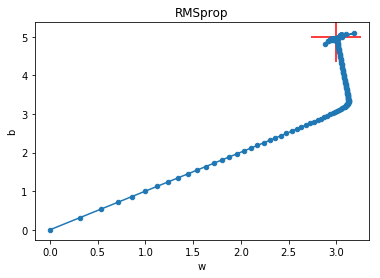

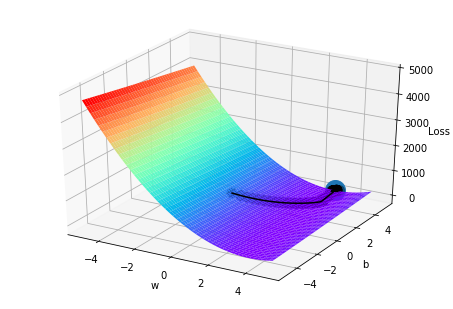

In [12]:
plot_history(w_history, b_history, title='RMSprop')

**<font color=#FF0000 size=3>上图可以看出，RMSprop只用了不到200次迭代就达到了最优值，并且学习率衰减的也很平缓，它同样也很稳定。</font>**

**RMSprop更新参数的方式跟Adagrad相比，主要是解决了Adagrad学习率衰减过快的问题，这个问题在模型比较复杂时非常重要，可以在一定程度上防止在参数更新时跳过最优值。**

**
上面提到的对原始梯度方法更新参数的改进，关注点都为学习率衰减这个问题。但在模型比较复杂的情况下，还存在一个非常非常重要的问题，那就是局部最优。 如何避免参数陷入局部最优，下面介绍的这种Momentum方法，在一定程度上缓解了这个问题，并且还可以加快收敛速度。  
Momentum是一种动量的梯度下降方式，那么什么是动量呢？我认为就是每次在参数更新时，都会有一个初始的速度。原始的梯度下降每次迭代更新参数的过程中，我们都会在计算当前位置梯度，然后去更新参数，我们上面已经介绍过了，这种更新方式会在一些对梯度敏感的参数方向上来回震荡。Momentum解决这个问题的方式就是，在更新当前参数时考虑原来的上一次的梯度。通俗的理解就是，一个人如果在原地静止不动，让他突然来一个大转弯，那么他很轻松的就可以转过来。如果这个人正在向一个方向奔跑，让他突然来一个大转弯，那显然很吃力，一般的情况下我们会有一个弧度慢慢的转过来。Momentum就是这样更新参数的，在每次更新参数时，用上一次的梯度乘以一个系数$\beta$加上这一次的梯度，用这个累加的梯度去更新。在当前梯度很小或者为0时，由于上一次梯度的存在，参数也会更新，这样在一定程度上也防止了陷入局部最优的情况。更新公式: 
** 
$$v^0 = 0$$

$$g^t = \frac{\partial{L}}{\partial{w^t}}$$
$$v^{t+1} = \beta v^t + (1 - \beta)g^t$$
$$w^{t+1} = w^{t} - \eta v^{t+1}$$  

**其中$\beta$为一个[0, 1)之间的常数，当$\beta$趋近于1，表示我们更看重上一次的梯度，反之，表示更看重当前的梯度。$\eta$为学习率。**

## Momentum

In [13]:
iteration = 1000
w = b = 0
lr = 0.001
v_w = 0
v_b = 0
beta = 0.9
parameters = {}
parameters['y'] = y
parameters['x'] = x
w_history = [w]
b_history = [b]
loss_history = []
for i in range(iteration):
    y_hat = w * x + b
    parameters['y_hat'] = y_hat
    loss_i = np.mean((y_hat - y) ** 2) / 2             # mse loss
    grad_w, grad_b = compute_grad(parameters, w, b)
    v_w = beta * v_w + (1 - beta) * grad_w  
    v_b = beta * v_b + (1 - beta) * grad_b
    w = w - lr * v_w
    b = b - lr * v_b
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_i)
print(w)
print(b)

3.0013497438420527
4.982491356406397


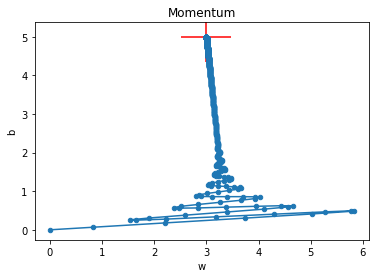

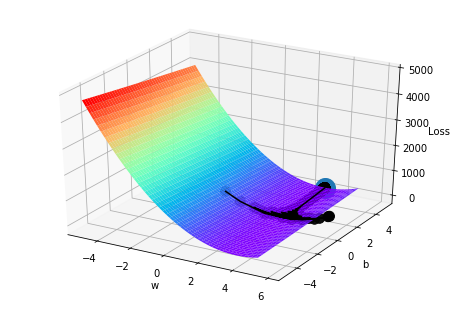

In [14]:
plot_history(w_history, b_history, title='Momentum')

**<font color=#FF0000 size=3>上图可以看出，Momentum在一开始在参数w方向震荡的还是比较严重的，这是因为一开始梯度的累加还很小，但是很快随着梯度的累加，它所占的比重越来越大，震荡的现象开始逐渐的缓和，并向着最优的方向直线前进。</font>**

**
上面介绍的这几种梯度更新方法，原始学习率衰减的梯度下降、Adagrad、RMSprop这几个考虑的学习率衰减的改进，Momentum考虑的是如何能够找到一个更好且更平滑的更新方向，且可以快速的到达最优解。下面介绍的梯度下降方法叫做Adam，它可以看做是RMSprop和Momentum的结合，它同时拥有两者的优点，所以它也是目前在深度学习中最最最流行的更新方式。具体的也不说了，很好用就得了。公式太多直接引用[论文](https://arxiv.org/abs/1412.6980)中的：
**

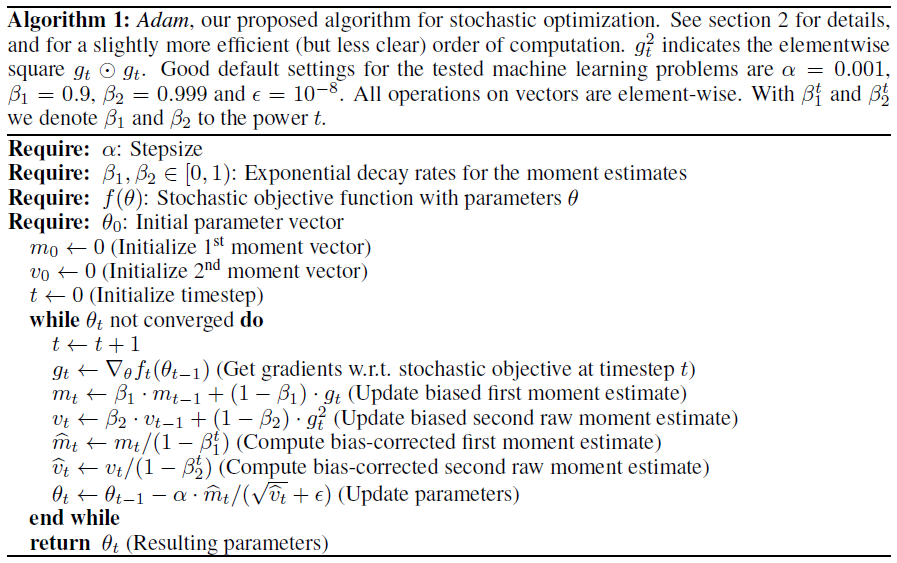

In [15]:
Image(filename='./adam.png')

## Adam

In [16]:
iteration = 1000
w = b = 0
epslion=1e-8
lr = 0.01
v_w = 0
v_b = 0
m_w = 0
m_b =0
beta1 = 0.1
beta2 = 0.6
parameters = {}
parameters['y'] = y
parameters['x'] = x
# for beta1 in np.arange(0, 1, step=0.1):
#     for beta2 in np.arange(0, 1, step=0.1):
w = b = 0
w_history = [w]
b_history = [b]
loss_history = []
for i in range(iteration):
    y_hat = w * x + b
    parameters['y_hat'] = y_hat
    loss_i = np.mean((y_hat - y) ** 2) / 2             # mse loss
    grad_w, grad_b = compute_grad(parameters, w, b)
    m_w = beta1 * m_w + (1 - beta1) * grad_w
    m_b = beta1 * m_w + (1 - beta1) * grad_b
    v_w = beta2 * v_w + (1 - beta2) * (grad_w ** 2)
    v_b = beta2 * v_b + (1 - beta2) * (grad_b ** 2)
    m_w_hat = m_w / (1 - beta1 ** (i+1))
    m_b_hat = m_b / (1 - beta1 ** (i+1))
    v_w_hat = v_w / (1 - beta2 ** (i+1))
    v_b_hat = v_b / (1 - beta2 ** (i+1))
    w = w - lr * m_w_hat / (np.sqrt(v_w_hat) + epslion)
    b = b - lr * m_b_hat / (np.sqrt(v_b_hat) + epslion)
    w_history.append(w)
    b_history.append(b)
    loss_history.append(loss_i)
print('beta1 = %f, beta2 = %f'%(beta1, beta2))
print(w)
print(b)


beta1 = 0.100000, beta2 = 0.600000
3.0040907948652804
5.009537540692813


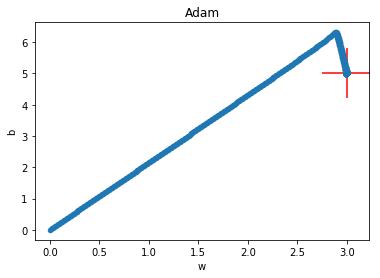

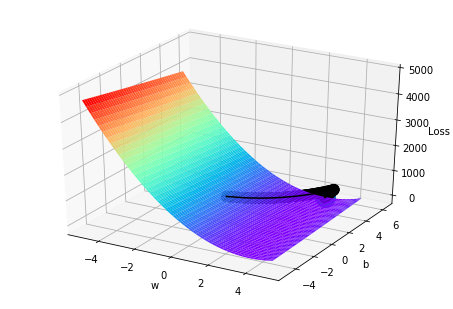

In [17]:
plot_history(w_history, b_history, title='Adam')

**
从上面的结果中，貌似Adam的表现还不如RMSprop，可能是我写的例子太简单了。。。。。根据别人的经验，在模型复杂时，特别是深度神经网络中，不妨优先试试Adam，它的效果一般都不错。<font color=#FF0000>（PS：Ng说的）</font>
**

## 总结

**
由于现在各种深度学习toolkits的出现,比如Keras(我的最爱)，Tensorflow，Pytorch（12月刚发布了1.0版本，貌似很厉害。。。。）等，人们可以不用太去关系梯度的计算和反向传播这些问题，极大的简化了从理论到实践的过程。我们只要有一个好的想法，可以很方便快速的利用这些工具去实现它。我认为这是目前深度学习这么火很重要的原因，试想一下，如果都从底层造轮子(我并不反对这个)，那这个难度就可以把绝大部分人挡在深度学习的大门外，说了一堆废话。。。。。回归正题。
总结这个最大的收获，自己要理解这些方法的基本原理是什么，当以后使用它的时候，最起码知道，每种方法的优势在哪儿，每个参数的意义是什么。在使用这些toolkits时,才能做到心中有数。
** 

## 参考资料

[1] 李宏毅，台湾大学. [Machine Learning (2017,Fall) ](http://speech.ee.ntu.edu.tw/~tlkagk/courses.html).  
[2] 深度学习（中文版）（Ian Goodfellow, Yoshua Bengio, Aaron Courville)  
[3] Kingma D P , Ba J . [Adam: A Method for Stochastic Optimization[J]](https://arxiv.org/abs/1412.6980). Computer Science, 2014.